## Step 1: download the data from 2008

http://stat-computing.org/dataexpo/2009/the-data.html

In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

os.chdir("/Users/adeniyiharrison/Downloads")
df = pd.read_csv("2008.csv").fillna(0)

In [2]:
pd.options.display.max_columns = 999

df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,0,0,0.0,0.0,0.0,0.0,0.0
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,0,0,0.0,0.0,0.0,0.0,0.0
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,0,0,2.0,0.0,0.0,0.0,32.0


### This dataset is WAY TOO BIG for the get_dummies function

+ Feel free to test it out and eventually use the "interrupt" function when you get bored
+ Hey maybe it still works? Who knows. It took a while for me. 

In [ ]:
# pd.get_dummies(df[['TailNum', 'Origin', 'Dest']])

### Let's first investigate the String Vars here

In [ ]:
df[['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']].head(10)

## We can use the Label Encoder to map the Strings to numbers!

+ THESE ARE NOT DUMMY VARIABLES
+ Note the fit vs fit_transform function

In [3]:
# This function converts string variables into numbers, which makes it easier to run in sklearn

from sklearn.preprocessing import  LabelEncoder

le = LabelEncoder()

# Could just do this to the unique values so that the the labelencoder can learn
le.fit(df['UniqueCarrier'].unique().tolist())

le.transform(df['UniqueCarrier'].head(100))


# Or you can run both in one line of code
# le.fit_tranform(df['UniqueCarrier'].unique().tolist())

array([17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17])

In [4]:
le = LabelEncoder()

le.fit_transform(df['UniqueCarrier'].head(10))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### TASK: How can you transform all character variables into numbers? 

+ Take 10 minutes to work with your partner

In [ ]:
df[['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']].head(10)

In [5]:
df2 = df.head(10000)

In [ ]:
df["UniqueCarrier"].head()

In [6]:
# Convert data type of value to string of NaN value
def convert(num):
    try:
        return(str(num))
    except:
        return(np.nan)

In [12]:
# df2["UniqueCarrier"] = df2["UniqueCarrier"].apply(lambda x: convert(x))
# df2["TailNum"] = df2["TailNum"].apply(lambda x: convert(x))
# df2["Origin"] = df2["Origin"].apply(lambda x: convert(x))
# df2["Dest"] = df2["Dest"].apply(lambda x: convert(x))
# df2["CancellationCode"] = df2["CancellationCode"].apply(lambda x: convert(x))

In [ ]:
# this is how you do it without the for loop
df2[['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']].apply(lambda x: le.fit_transform(x), axis = 1)

In [13]:
for x in ['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']:
    df2[x] = le.fit_transform(df2[x])
    

df2[['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']].head()

,UniqueCarrier,TailNum,Origin,Dest,CancellationCode
0,0,413,22,61,0
1,0,470,22,61,0
2,0,217,23,10,0
3,0,324,23,10,0
4,0,253,23,10,0


In [67]:
# Convert departure time into float from interger
df2["CRSDepTime"] = df2["CRSDepTime"].apply(lambda x: float(x))

# Convert deptime into float
df2["DepTime"] = df2["DepTime"].apply(lambda x: float(x))

# Converting distance into float
df2["Distance"] = df2["Distance"].apply(lambda x: float(x))

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

In [65]:
df2["Distance"].head()

0    810
1    810
2    515
3    515
4    515
Name: Distance, dtype: int64

In [15]:
df2.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [17]:
y = df2['DepDelay']

df2.drop(['DepDelay'], axis = 1, inplace = True, errors = 'ignore')

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [68]:
# float variables are usually continuous 
df2.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime           float64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier          int64
FlightNum              int64
TailNum                int64
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
Origin                 int64
Dest                   int64
Distance             float64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode       int64
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [69]:
df2.dtypes[df2.dtypes == np.int64]

Year                int64
Month               int64
DayofMonth          int64
DayOfWeek           int64
CRSArrTime          int64
UniqueCarrier       int64
FlightNum           int64
TailNum             int64
Origin              int64
Dest                int64
Cancelled           int64
CancellationCode    int64
Diverted            int64
dtype: object

In [70]:
intList = (df2.dtypes == np.int64)

### Now as a replacement for get_dummies we have OneHotEncoder

+ BUT YOU NEED TO SPECIFY WHICH VARIABLES ARE CATEGORICAL
+ Could we use "integer" type as a proxy for that?

In [71]:
from sklearn.preprocessing import OneHotEncoder

# categorical features all means convert all rows into dummies
# with it now equal to intList, if its true then take it and make dummy
onehot = OneHotEncoder(categorical_features = intList, sparse=True)

X = onehot.fit_transform(df2)

In [72]:
X

<10000x2771 sparse matrix of type '<class 'numpy.float64'>'
	with 235733 stored elements in COOrdinate format>

In [73]:
np.shape(X)
# 10000 rows and 2771 columns

(10000, 2771)

In [81]:
df2.dtypes == np.float64()

Year                 False
Month                False
DayofMonth           False
DayOfWeek            False
DepTime               True
CRSDepTime            True
ArrTime               True
CRSArrTime           False
UniqueCarrier        False
FlightNum            False
TailNum              False
ActualElapsedTime     True
CRSElapsedTime        True
AirTime               True
ArrDelay              True
Origin               False
Dest                 False
Distance              True
TaxiIn                True
TaxiOut               True
Cancelled            False
CancellationCode     False
Diverted             False
CarrierDelay          True
WeatherDelay          True
NASDelay              True
SecurityDelay         True
LateAircraftDelay     True
dtype: bool

In [ ]:
df2[["DepTime", "CRSDepTime", "ArrTime", "ActualElapsedTime", "CRSElapsedTime", "AirTime", "ArrDelay", 
     "Distance", "TaxiIn", "TaxiOut", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]]

### Note that OneHot Encoder returns a sparse matrix

+ What is a sparse matrix?

In [ ]:
##This is how big the dataset is

X.shape

### Assignment part I - 15 minutes

+ Using a subsection of the full dataset...
    - (otherwise it will be impossibly large)
    - Create interaction variables for month and ArrDelay
    - Note that Month must first be a dummy variable
    - There are many ways to do this

### Assignment Part II

+ Run a Ridge regression with month dummies, arrival delay and the interaction vars
+ Keep track of the coefficients by saving the names to a list
+ Which variables are larger than zero? 
+ How does your model perform on the testing set?

In [129]:
from scipy import stats
from sklearn import metrics
from sklearn import feature_selection
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = GridSearchCV(estimator = Ridge(), 
             param_grid = {"alpha": np.linspace(-10,10,100)},
             scoring = "neg_mean_squared_error", cv = 5)

ridge.fit(X,y)

ridgeAlgo = ridge.best_estimator_

In [117]:
residuals = (ridgeAlgo.predict(X) - y).tolist()
bins = math.ceil(np.sqrt(len(residuals)))

# print("P Values: ", stats.ttest_ind(X,y)[1])
print("P Values: ", feature_selection.f_regression(X, y)[1])
print("Coefficients: ", ridgeAlgo.coef_)
print("Y Intercepts: ", ridgeAlgo.intercept_)
print("R Squared: ", ridgeAlgo.score(X,y))
print("MSE: ", metrics.mean_squared_error(y,ridgeAlgo.predict(X)))

Coefficients:  [-0.05908467 -0.05908467 -0.00279884 ...,  0.10529004  0.00634115
  0.2129957 ]
Y Intercepts:  20.8311091426
R Squared:  0.956679774082
MSE:  47.2366765042


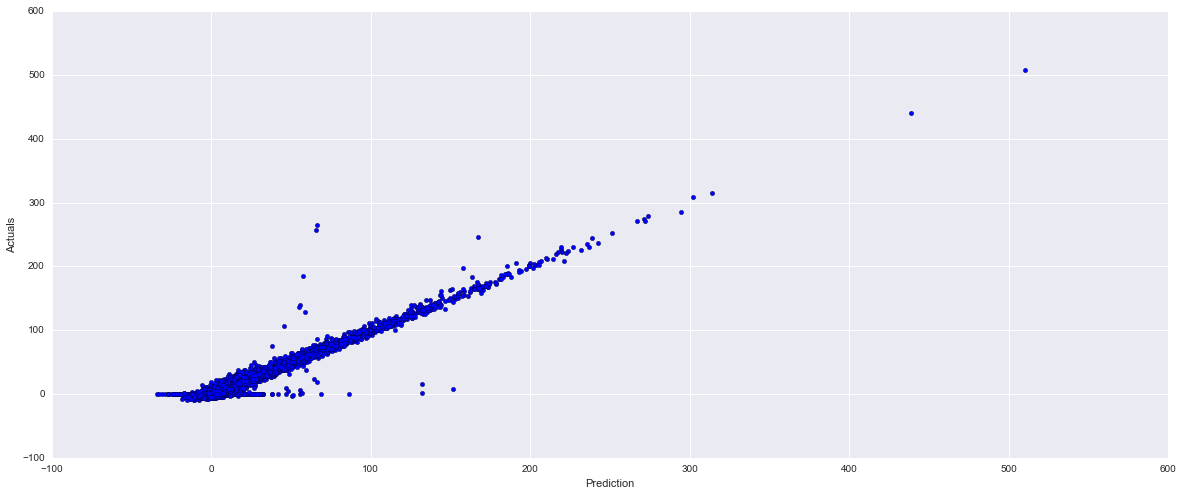

In [118]:
plt.figure(figsize = (20,8))
plt.scatter(x = ridgeAlgo.predict(X), y = y)
plt.xlabel("Prediction")
plt.ylabel("Actuals")

(array([  1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
        

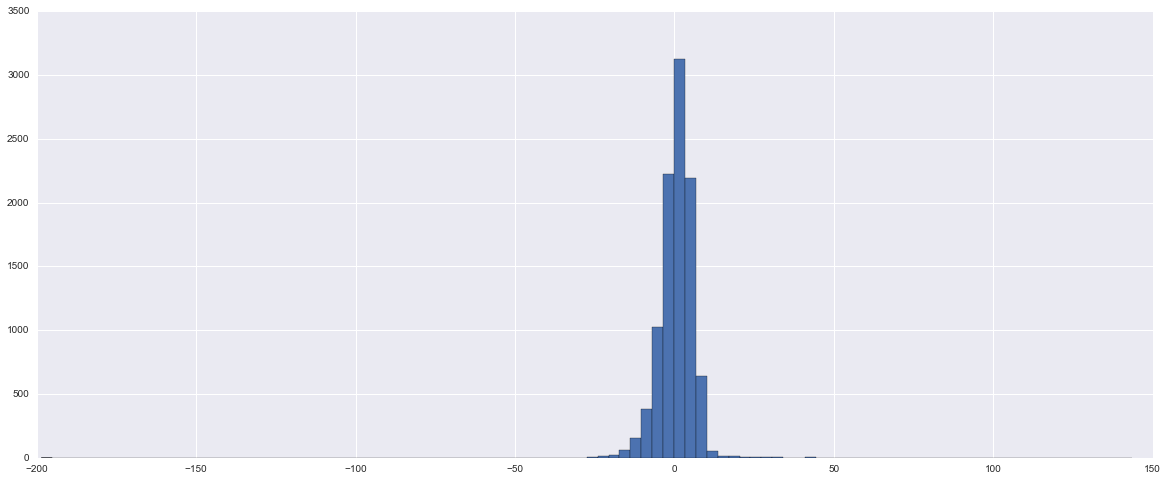

In [110]:
plt.figure(figsize = (20,8))
plt.hist(residuals, bins = bins)

#### Manual Regression if didnt use Grid Search

In [ ]:
from sklearn.model_selection import 

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)


In [ ]:
from sklearn import linear_model
lr = linear_model.Ridge(normalize=True)

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
lr.score(X_test, y_test)